In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression

In [2]:
### 1. Load Advertising.csv dataset using pandas
df = pd.read_csv("Advertising.csv", index_col = 0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
### 2. Standardize each column of the dataset
y = df["Sales"]
x = df.drop("Sales", axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)

### 3. Add an extra column composing of all ones to X for the bias
X.insert(0, 'bias', [1]*len(X))
X.head()

,bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802


In [4]:
### 4. Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (150, 4)
x_test shape: (50, 4)
y_train shape: (150,)
y_test shape: (50,)


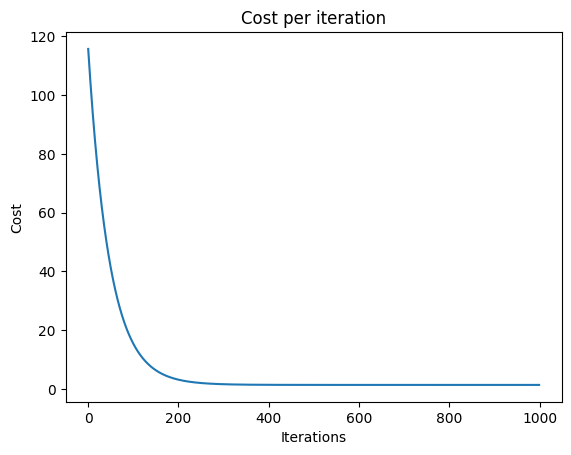

In [5]:
### 5. Fit the model on the training set.

# initialize weight either 0 or random
def initialize_weights():
    return np.array([0.0, 0.0, 0.0, 0.0])

# returns predicted values (y_hat)
def predict(x, w):
    return np.dot(x,w)

# returns cost or error (scalar value)
def compute_cost(x, y, w):
    predictions = predict(x, w)
    cost = (1 / (2 * len(y))) * np.sum((predictions - y)**2)

    return cost

# returns matrix w of partial derivative of cost function
# shape should be 4x1
def compute_gradient(x, y, w):
    predictions = predict(x, w)
    gradient = (1 / len(y)) * np.dot(x.T, predictions - y)

    return gradient

# returns updated weights
def update_weights(w, gradient, alpha):
    return w - alpha * gradient

# returns 2 matrices: weights and cost values per iteration
# calls functions 1-5 until number of iterations is done
def grad_descent(x, y, alpha, iterations):
    weights = initialize_weights()
    costs = []

    for i in range(iterations):
        cost = compute_cost(x, y, weights)
        costs.append(cost)

        gradient = compute_gradient(x, y, weights)

        weights = update_weights(weights, gradient, alpha)

    return weights, costs

# plot the costs as a function of iteration
def plot_costs(costs):
    plt.plot(costs, label='Cost')
    plt.title('Cost per iteration')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()


alpha = 0.01
iterations = 1000
weights, costs = grad_descent(x_train, y_train, alpha, iterations)
plot_costs(costs)


In [6]:
# 6. Predict y for train set and calculate the cost.
train_pred = predict(x_train, weights)
train_cost = compute_cost(x_train, y_train, weights)
print(f"Train Cost: {train_cost}")

# 7. Predict y for test set and calculate the cost
test_pred = predict(x_test, weights)
test_cost = compute_cost(x_test, y_test, weights)
print(f"Test Cost: {test_cost}")

Train Cost: 1.3839495897488712
Test Cost: 1.4403871759225526


In [7]:
### 8. Revert standardized data into original form
def revert_standardization  (data):
    return data * scaler.scale_[-1] + scaler.mean_[-1]

train_orig = revert_standardization(train_pred)
test_orig = revert_standardization(test_pred)

print(f"Train Predictions with Original Data: {train_orig}")
print(f"Test Predictions with Original Data: {test_orig}")

Train Predictions with Original Data: [364.57987969 287.36496735 307.07259998 263.19936774 170.48716185
 244.13221317 234.73741343 555.62913448 194.75373524 300.82415205
 415.94114469 361.95505894 276.89404603 264.09648321 395.3692817
 177.82793605 495.91498141 160.99399546 244.35727929 278.76905129
 230.0927932  170.58594108 353.56895797 406.66498538 372.94105013
 384.01314952 354.43914218 455.93343638 331.19745929 488.7402071
 302.6623333  329.09699954 222.65557964 399.85186411 210.64114046
 361.8999517  327.1361242  536.65363722 301.01206904 529.46238974
 172.88957205 433.62004736 540.21624216 436.18917213 402.78485029
 386.94637472 299.37333273 285.32305596 398.62635594 344.43632744
 317.64922353 194.8172953  448.72614791 237.79519018 455.09942959
 249.62204379 181.64856564 393.10723666 328.45487159 358.73173449
 266.06996781 479.1499959  549.23868888 427.16103644 416.84400113
 356.90807972 399.84724863 224.99363317 405.63721871 450.43371214
 385.29224329 106.97294378 143.4687947  

### Observe the cost results and analyse.
The model has a low cost, which suggests that it reasonably predicts the actual sales data. By minimizing the cost, you can find the best-fitting line and accurately predict the actual target values.

**Questions**

In [8]:
## 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:

print(f"Optimal Weights: {weights}")

  ##  What are your interpretations regarding the formed linear model?

    # The intercept 13.99 is the value when all inputs are 0.
    # The coefficient for TV is the highest which suggests has the strongest impact when it comes to sales.
    # Radio has a lower coefficient but also contributes to sales but to a lesser extent.
    # Newspaper's minimal coefficient implies that it has a very small impact on sales.

Optimal Weights: [13.99094292  3.89130413  2.833019    0.05850791]


Train Set R2 Score: 0.8966442502449699


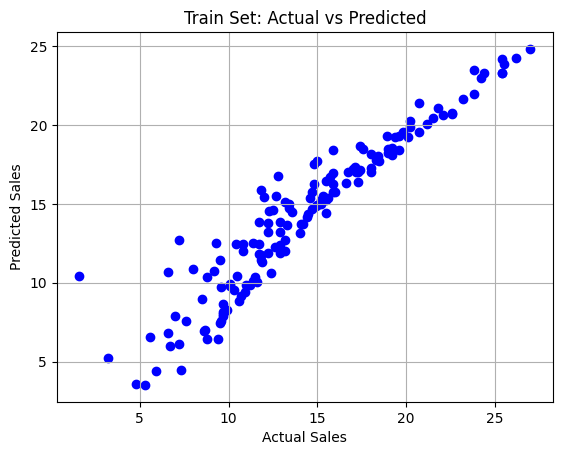

In [9]:
## 2.

#  Scatterplot and r2 score for Train set
train_r2 = r2_score(y_train, train_pred)
print(f"Train Set R2 Score: {train_r2}")

plt.scatter(y_train, train_pred, color='blue')
plt.title('Train Set: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)


Test Set R2 Score: 0.8934885791348633


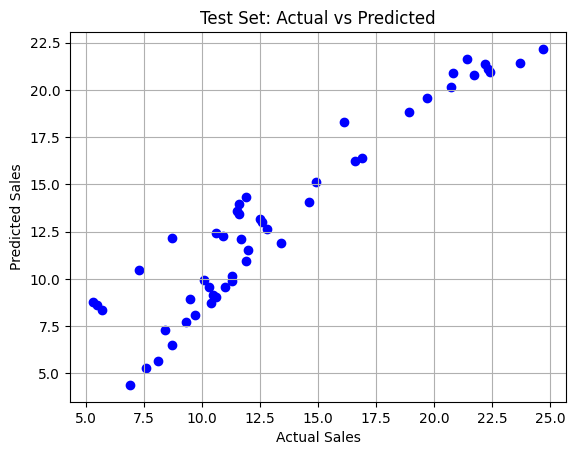

In [10]:

#  Scatterplot and r2 score for Test set
test_r2 = r2_score(y_test, test_pred)
print(f"Test Set R2 Score: {test_r2}")

plt.scatter(y_test, test_pred, color='blue')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)

In [11]:
## 3. What happens to the error, r2, and cost as the number of iterations increase?
# Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

iteration_list = [100,1000,10000,50000]

for i in iteration_list:
    weights, costs = grad_descent(x_train, y_train, alpha, i)
    train_pred = predict(x_train, weights)
    test_pred = predict(x_test, weights)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    print(f"Iteration: {i}")
    print(f"Train Set R2 Score: {train_r2}")
    print(f"Test Set R2 Score: {test_r2}")
    print(f"Cost: {costs[-1]}")
    print()



Iteration: 100
Train Set R2 Score: -0.1498298689858073
Test Set R2 Score: -0.05610794814820719
Cost: 15.69112521883486

Iteration: 1000
Train Set R2 Score: 0.8966442502449699
Test Set R2 Score: 0.8934885791348633
Cost: 1.3839496393389044

Iteration: 10000
Train Set R2 Score: 0.8966445527601499
Test Set R2 Score: 0.8935163320163669
Cost: 1.3839455390234863

Iteration: 50000
Train Set R2 Score: 0.8966445527601499
Test Set R2 Score: 0.8935163320163669
Cost: 1.3839455390234863



As the number of iterations increases, the R2 score improves and shows a better fit between the model and the data. The cost also significantly improves and decreases at iterations 1000 and higher. After around 10,000 iterations, the improvements slow down and eventually stabilize.

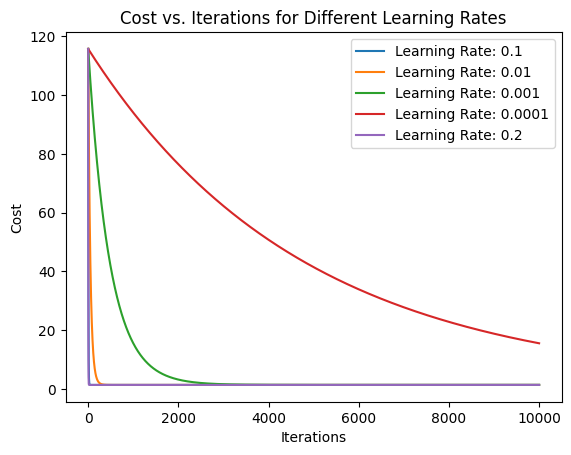

In [13]:
## 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate.
## The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others.
## Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

iterations = 10000
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

for lr in learning_rates:
    weights, costs = grad_descent(x_train, y_train, lr, iterations)
    plt.plot(costs, label=f'Learning Rate: {lr}')

plt.title('Cost vs. Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

If the learning rate is large, the cost function may potentially overshoot the minimum. If the learning rate is too small, on the other hand, it may take more time to converge.

## 5. Is there a relationship on the learning rate and the number of iterations?

Yes, there is a relationship. Overall, you must find an optimal learning rate,because as stated above, you may either overshoot or have more iterations to converge or failing to converge at all with either high or low learning rates. You may start with a higher learning rate then lower it after some iterations.


In [14]:
## 6. Compare the results with the results of ordinary least squares function.

ols_model = LinearRegression()
ols_model.fit(x_train.drop('bias', axis=1), y_train)

train_pred_ols = ols_model.predict(x_train.drop('bias', axis=1))
test_pred_ols = ols_model.predict(x_test.drop('bias', axis=1))

mse_train_ols = mean_squared_error(y_train, train_pred_ols)
mse_test_ols = mean_squared_error(y_test, test_pred_ols)

r2_train_ols = r2_score(y_train, train_pred_ols)
r2_test_ols = r2_score(y_test, test_pred_ols)

print("OLS:")
print(f"Train MSE: {mse_train_ols}")
print(f"Test MSE: {mse_test_ols}")
print(f"Train R2 Score: {r2_train_ols}")
print(f"Test R2 Score: {r2_test_ols}")
print()
print("Gradient Descent:")
print(f"Train MSE: {train_cost}")
print(f"Test MSE: {test_cost}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")


OLS:
Train MSE: 2.7678910780469725
Test MSE: 2.880023730094192
Train R2 Score: 0.8966445527601499
Test R2 Score: 0.8935163320163658

Gradient Descent:
Train MSE: 1.3839495897488712
Test MSE: 1.4403871759225526
Train R2 Score: 0.8966445527601499
Test R2 Score: 0.8935163320163669


In both methods, the R2 scores are similar, meaning that they fit their data comparably well. However, it can be seen that the MSE of the gradient descent is lower which indicates a slighty better performance compared to OLS.
In conclusion, linear regression with gradient descent may be the better with this dataset.